In [ ]:
import os
os.getcwd()

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel("dataset -P543 DS.xlsx")

# Display first few rows
df.head()

In [ ]:
print(df.columns)

In [ ]:
# Check for missing values
print("🔎 Missing values per column:")
print(df.isnull().sum())

# Check for duplicate entries
print("\n📌 Number of duplicate rows:")
print(df.duplicated().sum())

In [ ]:
# Create sentiment labels from ratings
def assign_sentiment(rating):
    if rating <= 2:
        return "Negative"
    elif rating == 3:
        return "Neutral"
    else:
        return "Positive"

# Apply the function
df['sentiment'] = df['rating'].apply(assign_sentiment)

# View sample
df[['rating', 'sentiment']].head(10)

In [ ]:
# Create sentiment labels based on the rating column
def assign_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

# Apply this function to create the sentiment column
df['sentiment'] = df['rating'].apply(assign_sentiment)

# Check if the column is added correctly
df[['rating', 'sentiment']].head()


In [ ]:
# Count the number of each sentiment category
sentiment_counts = df['sentiment'].value_counts()
total_reviews = sentiment_counts.sum()

# Display the counts and percentages
print("🔢 Sentiment Distribution (Counts & Percentages):")
for sentiment in ['Positive', 'Neutral', 'Negative']:
    count = sentiment_counts.get(sentiment, 0)
    percent = (count / total_reviews) * 100 if total_reviews > 0 else 0
    print(f"{sentiment} reviews: {count} ({percent:.2f}%)")


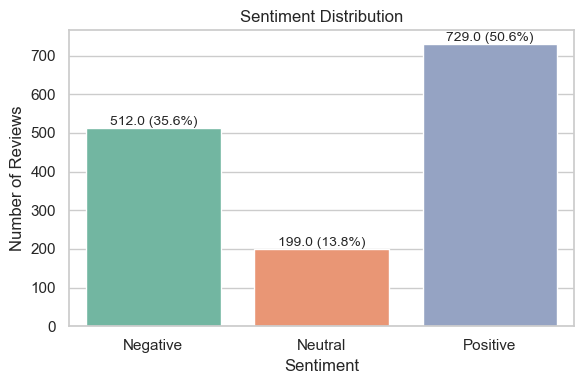

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count data for annotations
sentiment_counts = df['sentiment'].value_counts()
total = sentiment_counts.sum()

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=df,
    x='sentiment',
    order=['Negative', 'Neutral', 'Positive'],
    palette='Set2',
    hue='sentiment',
    legend=False
)

# Annotate bars with count and %
for p in ax.patches:
    height = p.get_height()
    label = f"{height} ({(height/total)*100:.1f}%)"
    ax.annotate(label,
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=10)

# Titles and labels
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


In [ ]:
pip install wordcloud

In [ ]:

from wordcloud import WordCloud

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Word Clouds for each sentiment
generate_wordcloud(df[df['sentiment'] == 'Positive']['body'], 'Positive Reviews')
generate_wordcloud(df[df['sentiment'] == 'Neutral']['body'], 'Neutral Reviews')
generate_wordcloud(df[df['sentiment'] == 'Negative']['body'], 'Negative Reviews')

In [ ]:
#📊 Advanced EDA Ideas for title and body Columns
#✅ Review Length Analysis




import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure body_length column exists
df['body_length'] = df['body'].apply(lambda x: len(str(x).split()))

# Total number of reviews
total_reviews = len(df)

# Group by sentiment: average body length and review counts
sentiment_stats = df.groupby('sentiment').agg(
    body_length=('body_length', 'mean'),
    review_count=('body', 'count')
).reset_index()

# Calculate percentage
sentiment_stats['percentage'] = sentiment_stats['review_count'] / total_reviews * 100

# Plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=sentiment_stats, x='sentiment', y='body_length', marker='o', color='teal')

# Annotate each point with count and percentage
for i, row in sentiment_stats.iterrows():
    annotation = f"{row['body_length']:.2f}\n{row['review_count']} ({row['percentage']:.1f}%)"
    plt.text(row['sentiment'], row['body_length'] + 0.5, annotation,
             ha='center', va='bottom', fontsize=9, color='black', fontweight='bold')

# Labels and title
plt.title('Average Review Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Body Length (words)')
plt.tight_layout()
plt.show()


In [ ]:
#✅ 4. Correlation Between Ratings and Length
# Simplified Chart: Average Review Length by Rating


import matplotlib.pyplot as plt
import pandas as pd

# Total reviews
total_reviews = len(df)

# Group data to get average length, count, and percentage per rating
avg_length_per_rating = df.groupby('rating').agg(
    body_length=('body_length', 'mean'),
    review_count=('body', 'count')
).reset_index()

avg_length_per_rating['percentage'] = (avg_length_per_rating['review_count'] / total_reviews) * 100

# Plot
plt.figure(figsize=(8, 5))
plt.plot(avg_length_per_rating['rating'], avg_length_per_rating['body_length'], marker='o', color='royalblue')

# Add annotations: average length, count, and %
for i, row in avg_length_per_rating.iterrows():
    annotation = f"{row['body_length']:.1f}\n{row['review_count']} ({row['percentage']:.1f}%)"
    plt.text(row['rating'], row['body_length'] + 1, annotation, ha='center', fontsize=9, fontweight='bold')

# Final touches
plt.title('Average Review Length by Rating')
plt.xlabel('Rating (Stars)')
plt.ylabel('Average Review Length (Words)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print(df.columns)

In [ ]:
# Create cleaned_body column by converting body text to lowercase
df['cleaned_body'] = df['body'].astype(str).str.lower()


In [ ]:
# ✅ 3. N-gram Analysis

from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(sentiment, n=2, top_k=10):
    texts = df[df['sentiment'] == sentiment]['cleaned_body']
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_k]

# Example: Get top 10 unigrams (n=2) for 'Negative' sentiment
print(get_top_ngrams('Negative', n=2, top_k=10))


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Filter Samsung-related reviews
samsung_df = df[df['body'].str.contains('samsung', case=False, na=False)][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 Samsung-related Reviews:")
print(samsung_df.head())

# 📊 Count by sentiment
samsung_sentiment_counts = samsung_df['sentiment'].value_counts()
total_samsung_reviews = samsung_sentiment_counts.sum()

print("\n📊 Samsung Review Sentiment Counts:")
for sentiment, count in samsung_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_samsung = samsung_df['rating'].mean()
print("\n⭐ Average Samsung Review Rating:", round(avg_rating_samsung, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=samsung_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='Set1', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Samsung Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Filter Realme-related reviews
realme_df = df[df['body'].str.contains('realme', case=False, na=False)][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 Realme-related Reviews:")
print(realme_df.head())

# 📊 Count by sentiment
realme_sentiment_counts = realme_df['sentiment'].value_counts()
total_realme_reviews = realme_sentiment_counts.sum()

print("\n📊 Realme Review Sentiment Counts:")
for sentiment, count in realme_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_realme = realme_df['rating'].mean()
print("\n⭐ Average Realme Review Rating:", round(avg_rating_realme, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=realme_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='Set2', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Realme Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Filter Vivo-related reviews
vivo_df = df[df['body'].str.contains('vivo', case=False, na=False)][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 Vivo-related Reviews:")
print(vivo_df.head())

# 📊 Count by sentiment
vivo_sentiment_counts = vivo_df['sentiment'].value_counts()
total_vivo_reviews = vivo_sentiment_counts.sum()

print("\n📊 Vivo Review Sentiment Counts:")
for sentiment, count in vivo_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_vivo = vivo_df['rating'].mean()
print("\n⭐ Average Vivo Review Rating:", round(avg_rating_vivo, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=vivo_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='pastel', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Vivo Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Filter Oppo-related reviews
oppo_df = df[df['body'].str.contains('oppo', case=False, na=False)][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 Oppo-related Reviews:")
print(oppo_df.head())

# 📊 Count by sentiment
oppo_sentiment_counts = oppo_df['sentiment'].value_counts()
total_oppo_reviews = oppo_sentiment_counts.sum()

print("\n📊 Oppo Review Sentiment Counts:")
for sentiment, count in oppo_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_oppo = oppo_df['rating'].mean()
print("\n⭐ Average Oppo Review Rating:", round(avg_rating_oppo, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=oppo_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='Set3', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Oppo Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Filter iPhone-related reviews (fix regex warning using non-capturing group)
iphone_df = df[df['body'].str.contains(r'\b(?:iphone|apple iphone)\b', case=False, na=False)][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 iPhone-related Reviews:")
print(iphone_df.head())

# 📊 Count by sentiment
iphone_sentiment_counts = iphone_df['sentiment'].value_counts()
total_iphone_reviews = iphone_sentiment_counts.sum()

print("\n📊 iPhone Review Sentiment Counts:")
for sentiment, count in iphone_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_iphone = iphone_df['rating'].mean()
print("\n⭐ Average iPhone Review Rating:", round(avg_rating_iphone, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=iphone_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='cool', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("iPhone Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🧹 Filter reviews that do NOT mention samsung, realme, vivo, oppo, iphone, or apple iphone
exclude_keywords = ['samsung', 'realme', 'vivo', 'oppo', 'iphone', 'apple iphone']

# Create a mask that excludes all the mentioned brands
mask = ~df['body'].str.contains('|'.join(exclude_keywords), case=False, na=False)
other_df = df[mask][['rating', 'sentiment', 'body']]

# 👀 View samples
print("\n📱 Other Brands-related Reviews:")
print(other_df.head())

# 📊 Count by sentiment
other_sentiment_counts = other_df['sentiment'].value_counts()
total_other_reviews = other_sentiment_counts.sum()

print("\n📊 Other Brand Review Sentiment Counts:")
for sentiment, count in other_sentiment_counts.items():
    print(f"{sentiment}: {count} reviews")

# ⭐ Average rating
avg_rating_other = other_df['rating'].mean()
print("\n⭐ Average Other Brand Review Rating:", round(avg_rating_other, 2))

# 🎨 Plot with count annotations only
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=other_df, x='sentiment', order=['Negative', 'Neutral', 'Positive'],
                   palette='muted', hue='sentiment', legend=False)

# 📌 Annotate counts only
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# 🏷️ Labels and title
plt.title("Other Brands Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


In [ ]:
#####################################################Model Building/Evaluation##############################################

 Accuracy: 0.77

 Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.84      0.84       111
     Neutral       1.00      0.09      0.17        44
    Positive       0.72      0.94      0.82       133

    accuracy                           0.77       288
   macro avg       0.85      0.62      0.61       288
weighted avg       0.81      0.77      0.73       288



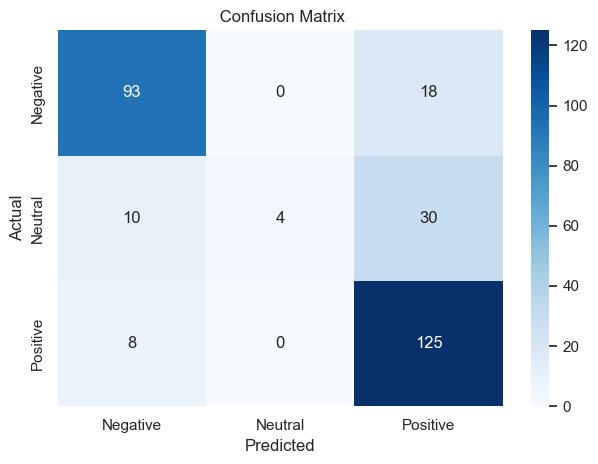

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic cleaning
df['cleaned_body'] = df['body'].astype(str).str.lower()

# New features from EDA
df['review_length'] = df['body'].apply(lambda x: len(str(x).split()))
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Basic brand flag (optional)
import numpy as np
brands = ['samsung', 'iphone', 'realme', 'vivo', 'oppo']
df['brand'] = np.select(
    [df['body'].str.contains(b, case=False, na=False) for b in brands],
    brands,
    default='other'
)

# Features & Target
X = df[['cleaned_body', 'review_length', 'title_length', 'brand']]
y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=3000, stop_words='english'), 'cleaned_body'),
        ('num', StandardScaler(), ['review_length', 'title_length']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['brand'])
    ]
)

# Full pipeline
model_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train
model_pipeline.fit(X_train, y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluate
print(" Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix")
plt.tight_layout()
plt.show()


✅ Accuracy: 0.76

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.80      0.82       157
     Neutral       0.36      0.32      0.34        62
    Positive       0.80      0.85      0.83       213

    accuracy                           0.76       432
   macro avg       0.67      0.66      0.66       432
weighted avg       0.75      0.76      0.76       432



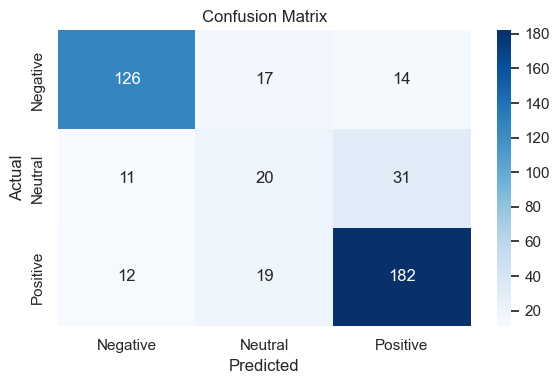

✅ Model pipeline saved as 'sentiment_model.pkl'


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Preprocessing
df['cleaned_body'] = df['body'].astype(str).str.lower()
df['review_length'] = df['body'].apply(lambda x: len(str(x).split()))
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Brand mapping
brands = ['samsung', 'iphone', 'realme', 'vivo', 'oppo']
df['brand'] = np.select(
    [df['body'].str.contains(b, case=False, na=False) for b in brands],
    brands,
    default='other'
)

# Features and target
X = df[['cleaned_body', 'review_length', 'title_length', 'brand']]
y = df['sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=3000, stop_words='english'), 'cleaned_body'),
        ('num', StandardScaler(), ['review_length', 'title_length']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['brand'])
    ]
)

# Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Complete pipeline with SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Save model
joblib.dump(pipeline, 'sentiment_model.pkl')
print("✅ Model pipeline saved as 'sentiment_model.pkl'")


✅ Accuracy: 0.77

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.84      0.84       111
     Neutral       0.41      0.32      0.36        44
    Positive       0.80      0.86      0.83       133

    accuracy                           0.77       288
   macro avg       0.69      0.67      0.68       288
weighted avg       0.76      0.77      0.76       288



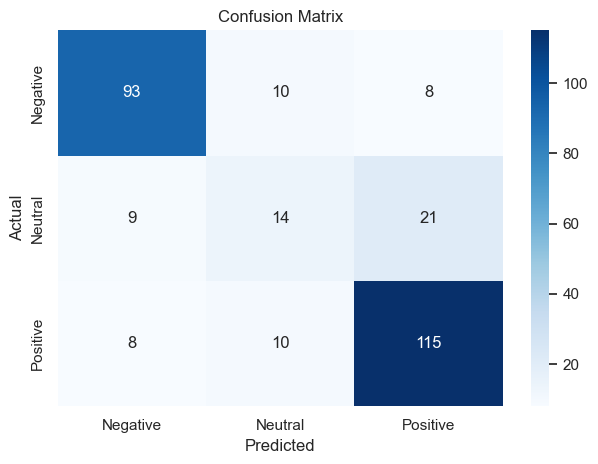

✅ Model saved successfully!


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess text and create features
df['cleaned_body'] = df['body'].astype(str).str.lower()
df['review_length'] = df['body'].apply(lambda x: len(str(x).split()))
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

brands = ['samsung', 'iphone', 'realme', 'vivo', 'oppo']
df['brand'] = np.select(
    [df['body'].str.contains(b, case=False, na=False) for b in brands],
    brands,
    default='other'
)

# Features and target
X = df[['cleaned_body', 'review_length', 'title_length', 'brand']]
y = df['sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=3000, stop_words='english'), 'cleaned_body'),
        ('num', StandardScaler(), ['review_length', 'title_length']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['brand'])
    ]
)

# Logistic Regression with balanced weights
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Pipeline with SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', logistic_model)
])

# Fit model
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)

# Results
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Negative', 'Neutral', 'Positive'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

import joblib

# Save the trained pipeline (model) to a file
joblib.dump(pipeline, 'sentiment_model.pkl')
print("✅ Model saved successfully!")



In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       111
           1       0.33      0.09      0.14        44
           2       0.72      0.92      0.81       133

    accuracy                           0.75       288
   macro avg       0.63      0.60      0.59       288
weighted avg       0.71      0.75      0.71       288



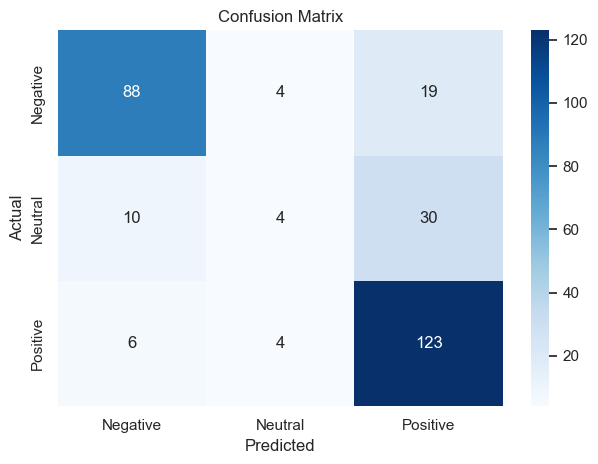

In [24]:
# Step 1: Install xgboost (if not already installed)
# !pip install xgboost

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Basic cleaning
df['cleaned_body'] = df['body'].astype(str).str.lower()

# New features from EDA
df['review_length'] = df['body'].apply(lambda x: len(str(x).split()))
df['title_length'] = df['title'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Basic brand flag (optional)
import numpy as np
brands = ['samsung', 'iphone', 'realme', 'vivo', 'oppo']
df['brand'] = np.select(
    [df['body'].str.contains(b, case=False, na=False) for b in brands],
    brands,
    default='other'
)

# Features & Target
X = df[['cleaned_body', 'review_length', 'title_length', 'brand']]
y = df['sentiment']

# Convert labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # This converts 'Negative', 'Neutral', 'Positive' to 0, 1, 2

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(max_features=3000, stop_words='english'), 'cleaned_body'),
        ('num', StandardScaler(), ['review_length', 'title_length']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['brand'])
    ]
)

# XGBoost pipeline (removed use_label_encoder)
xgb_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', xgb.XGBClassifier(eval_metric='mlogloss'))
])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predict
y_pred = xgb_pipeline.predict(X_test)

# Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred), 2))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



In [ ]:
########################################################## streamlit web api ##################################################

In [ ]:
#conda activate streamlit_env
#cd "C:\Users\ASUS\Desktop\projects\DATA SCIENCE Sentiment Analysis"
#streamlit run app.py

